In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

In [88]:
df = pd.read_csv("./data/dataset_clean.csv")

In [89]:
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,target_emergencia,saturation_measured
0,2,2,71,3,3,2,1,1,2.0,160.0,100.0,84.0,18.0,36.6,0,1
1,1,1,56,12,3,2,1,1,2.0,137.0,75.0,60.0,20.0,36.5,0,0
2,2,1,68,8,2,2,1,1,2.0,130.0,80.0,102.0,20.0,36.6,0,1
3,1,2,71,8,1,1,1,1,3.0,139.0,94.0,88.0,20.0,36.5,0,0
4,1,2,58,4,3,1,1,1,3.0,91.0,67.0,93.0,18.0,36.5,0,0


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

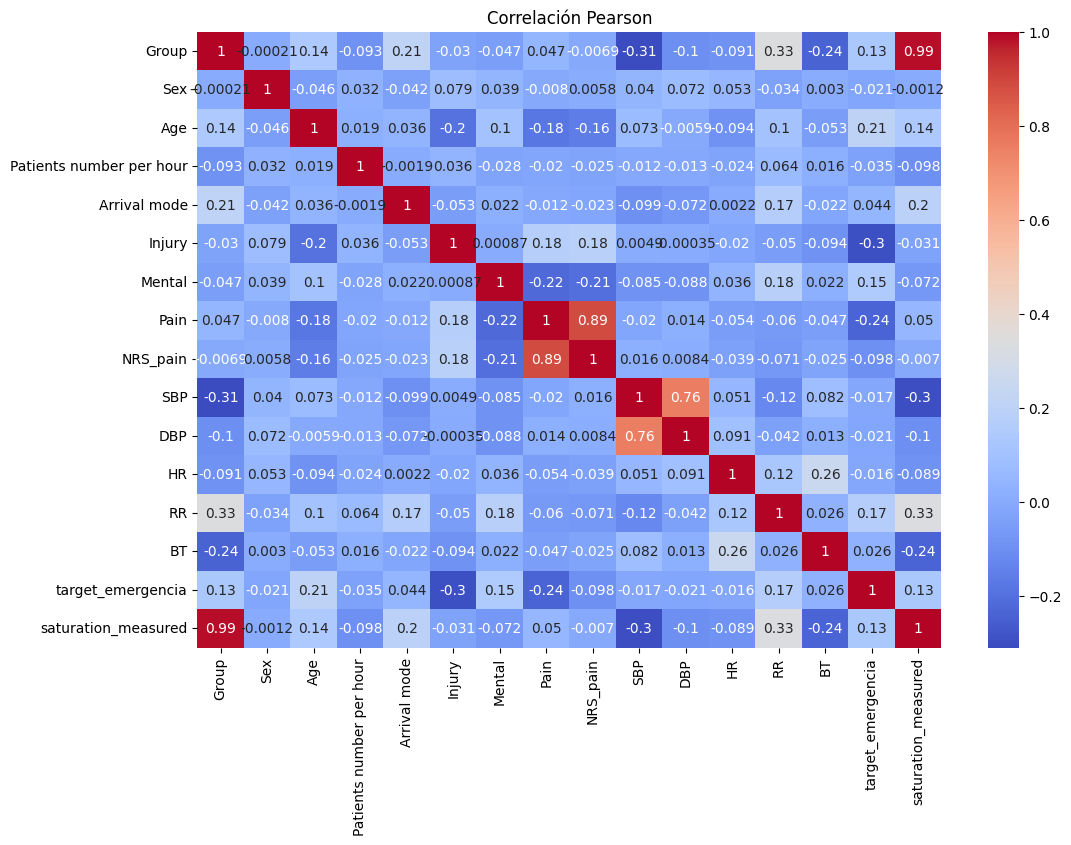

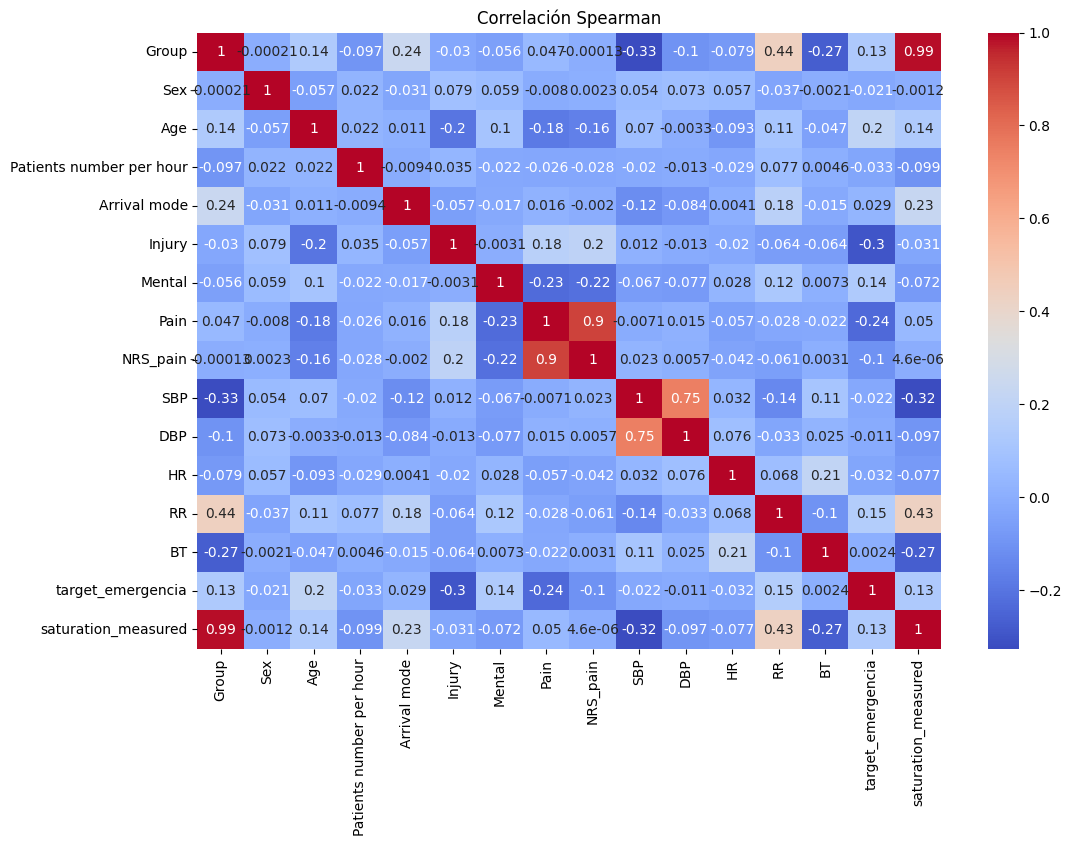

In [7]:
df_corr = df.select_dtypes(include='number')

# Pearson
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Correlación Pearson")
plt.show()

# Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Correlación Spearman")
plt.show()

No hay relaciones lineales fuertes entre variables y la clase (target_emergencia).

In [91]:
columnas_eliminar = [
    'Pain',                  # ya representado en NRS_pain
    'DBP',                   # correlación alta con SBP
    'saturation_measured'    # redundante con Group
]

df.drop(columns=columnas_eliminar, inplace=True)

In [92]:
def show_full_dataset(df):
    with pd.option_context('display.max_columns', None,
                       'display.max_colwidth', None,
                       'display.max_rows', 100):
        display(df)

In [93]:
show_full_dataset(df.head())

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,NRS_pain,SBP,HR,RR,BT,target_emergencia
0,2,2,71,3,3,2,1,2.0,160.0,84.0,18.0,36.6,0
1,1,1,56,12,3,2,1,2.0,137.0,60.0,20.0,36.5,0
2,2,1,68,8,2,2,1,2.0,130.0,102.0,20.0,36.6,0
3,1,2,71,8,1,1,1,3.0,139.0,88.0,20.0,36.5,0
4,1,2,58,4,3,1,1,3.0,91.0,93.0,18.0,36.5,0


In [11]:
X = df.drop(columns='target_emergencia')
y = df['target_emergencia']

Normalizar columnas numéricas

In [12]:
def plot_boxplot_and_hist(data, variable):
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True,
        gridspec_kw={"height_ratios": (0.50, 1)},
        figsize=(8, 6)
    )
    sns.boxplot(x=data[variable], ax=ax_box, color='tomato')
    sns.histplot(data[variable], ax=ax_hist, bins=30, kde=True)
    plt.title('Distribución de ' + variable)
    plt.show()

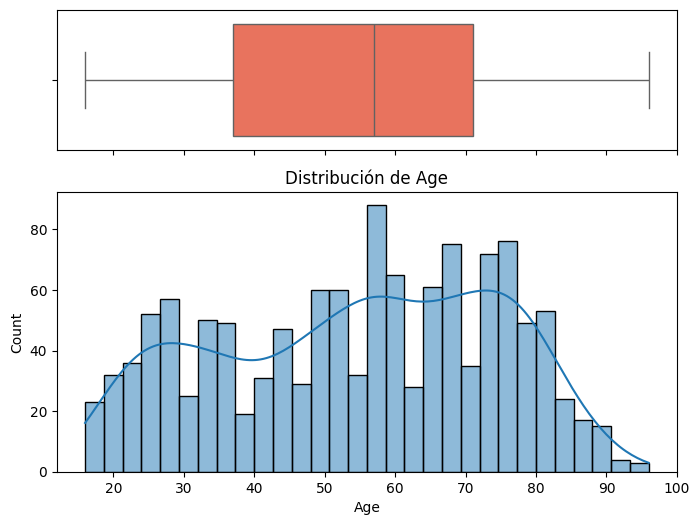

In [13]:
plot_boxplot_and_hist(df, 'Age')

Elección: StandardScaler

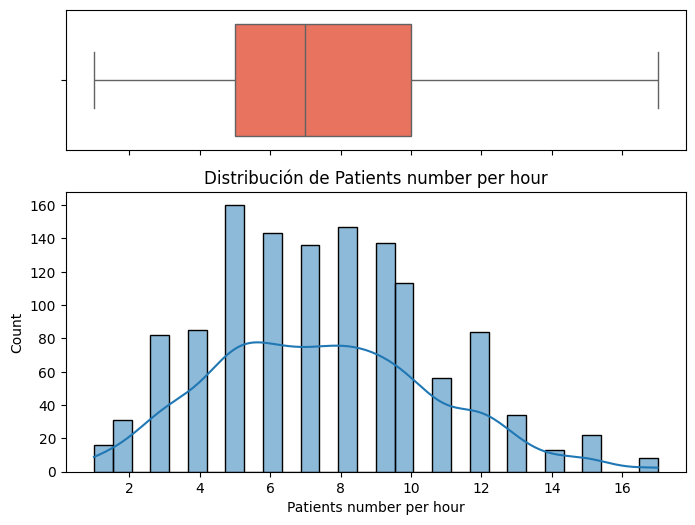

In [14]:
plot_boxplot_and_hist(df, 'Patients number per hour')

Elección: StandardScaler

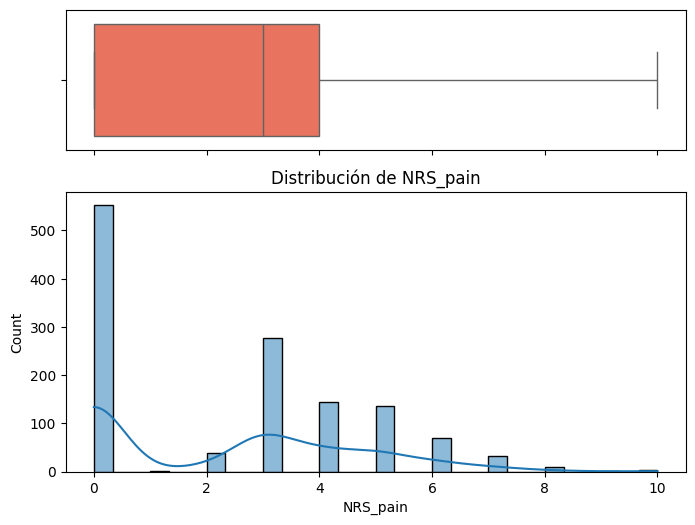

In [15]:
plot_boxplot_and_hist(df, 'NRS_pain')

Muy sesgada, picos en 0.

Elección: RobustScaler

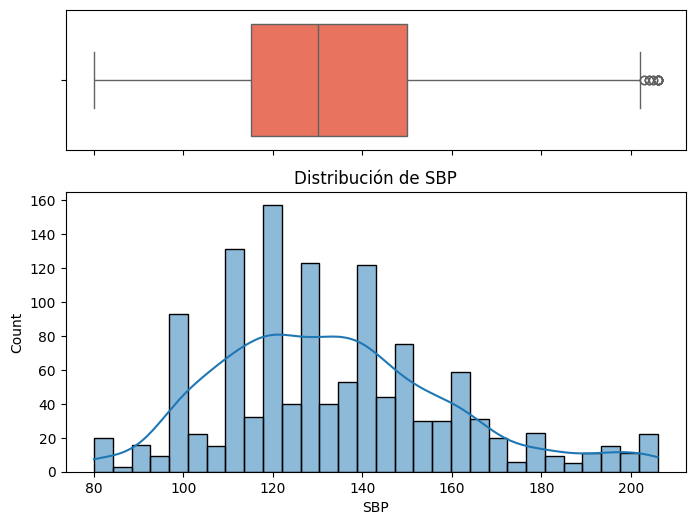

In [26]:
plot_boxplot_and_hist(df, 'SBP')

Distribución: Sesgada derecha

Outliers: Algunos

Elección: RobustScaler

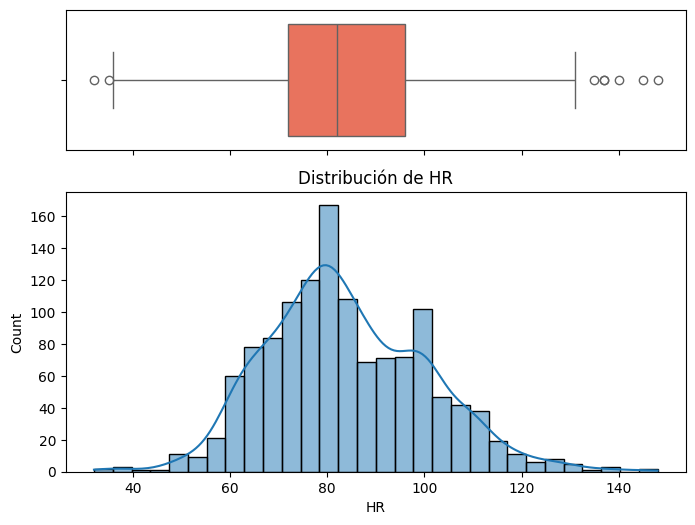

In [17]:
plot_boxplot_and_hist(df, 'HR')

Distribución: Aproximadamente normal

Outliers: Algunos leves

Elección: StandardScaler

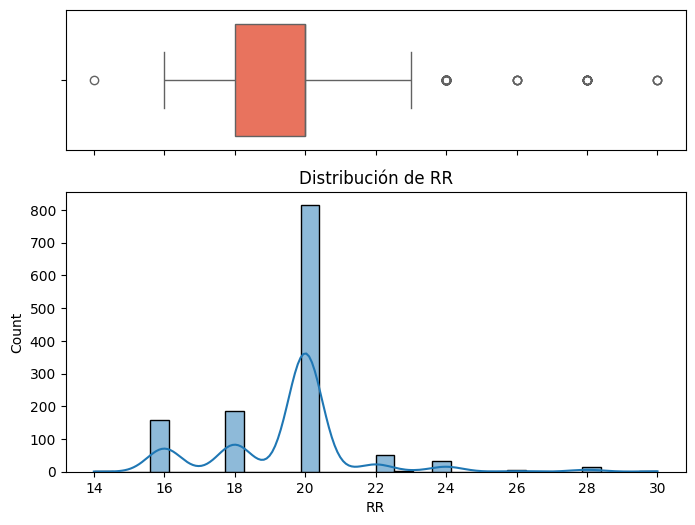

In [18]:
plot_boxplot_and_hist(df, 'RR')

Distribución: Pico fuerte en 20, ruido.

Outliers raros.

Elección: RobustScaler

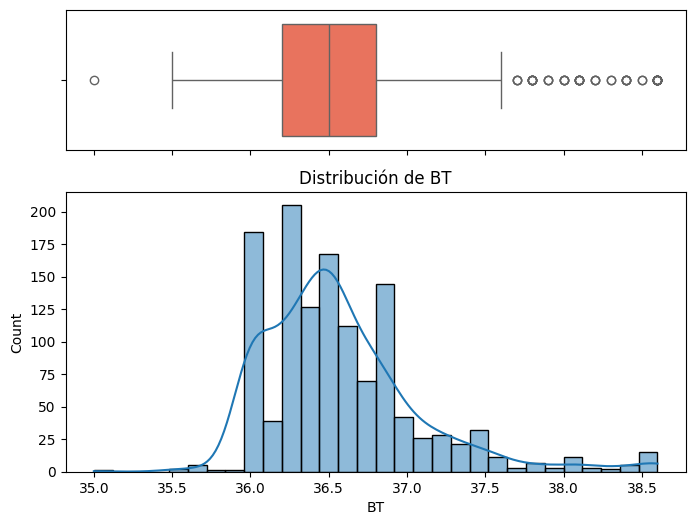

In [19]:
plot_boxplot_and_hist(df, 'BT')

RobustScaler

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [30]:
standard_cols = ['Age', 'Patients number per hour', 'HR']
robust_cols = ['NRS_pain', 'SBP', 'RR', 'BT']

In [31]:
X_encoded = pd.get_dummies(X, columns=['Group', 'Sex', 'Arrival mode', 'Injury', 'Mental'])

In [32]:
X_scaled = X_encoded.copy()

In [33]:
scaler_std = StandardScaler()
scaler_rob = RobustScaler()

In [34]:
X_scaled[standard_cols] = scaler_std.fit_transform(X_scaled[standard_cols])
X_scaled[robust_cols] = scaler_rob.fit_transform(X_scaled[robust_cols])

In [35]:
show_full_dataset(X_encoded)

,Age,Patients number per hour,NRS_pain,SBP,HR,RR,BT,Group_1,Group_2,Sex_1,Sex_2,Arrival mode_1,Arrival mode_2,Arrival mode_3,Arrival mode_4,Arrival mode_5,Arrival mode_6,Arrival mode_7,Injury_1,Injury_2,Mental_1,Mental_2,Mental_3,Mental_4
0,71,3,2.0,160.0,84.0,18.0,36.6,False,True,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False
1,56,12,2.0,137.0,60.0,20.0,36.5,True,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False
2,68,8,2.0,130.0,102.0,20.0,36.6,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False
3,71,8,3.0,139.0,88.0,20.0,36.5,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
4,58,4,3.0,91.0,93.0,18.0,36.5,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,79,5,0.0,120.0,86.0,22.0,36.4,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
1263,81,2,0.0,120.0,94.0,20.0,36.4,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False
1264,81,17,0.0,130.0,80.0,20.0,36.2,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
1265,81,2,0.0,170.0,78.0,20.0,36.6,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False


In [38]:
show_full_dataset(X_scaled)

,Age,Patients number per hour,NRS_pain,SBP,HR,RR,BT,Group_1,Group_2,Sex_1,Sex_2,Arrival mode_1,Arrival mode_2,Arrival mode_3,Arrival mode_4,Arrival mode_5,Arrival mode_6,Arrival mode_7,Injury_1,Injury_2,Mental_1,Mental_2,Mental_3,Mental_4
0,0.840694,-1.430480,-0.25,0.857143,0.004112,-1.0,0.166667,False,True,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False
1,0.079938,1.418238,-0.25,0.200000,-1.449782,0.0,0.000000,True,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False
2,0.688543,0.152141,-0.25,0.000000,1.094532,0.0,0.166667,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False
3,0.840694,0.152141,0.00,0.257143,0.246427,0.0,0.000000,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
4,0.181372,-1.113955,0.00,-1.114286,0.549322,-1.0,0.000000,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1.246430,-0.797431,-0.75,-0.285714,0.125270,1.0,-0.166667,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
1263,1.347864,-1.747004,-0.75,-0.285714,0.609901,0.0,-0.166667,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False
1264,1.347864,3.000860,-0.75,0.000000,-0.238204,0.0,-0.500000,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
1265,1.347864,-1.747004,-0.75,1.142857,-0.359361,0.0,0.166667,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False


In [39]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1262    1
1263    0
1264    1
1265    1
1266    1
Name: target_emergencia, Length: 1267, dtype: int64

In [40]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, 
            perplexity=20, 
            learning_rate=200, 
            max_iter=1000, 
            random_state=42, 
            init='pca')

X_tsne = tsne.fit_transform(X_scaled)

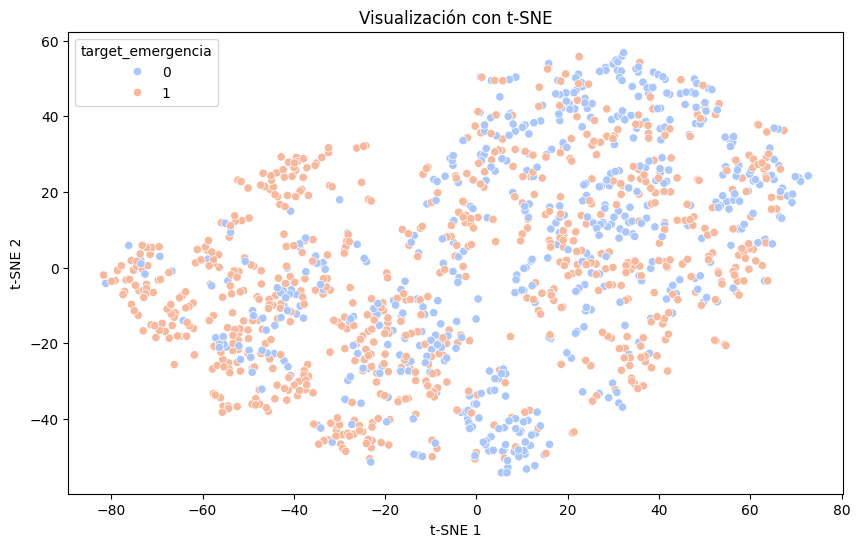

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm')
plt.title('Visualización con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [69]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [70]:
tsne_3d = TSNE(n_components=3, perplexity=20, learning_rate=200, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

In [73]:
import plotly.io as pio

In [74]:
df_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
df_tsne_3d['target_emergencia'] = y.values

fig = px.scatter_3d(
    df_tsne_3d,
    x='TSNE-1', y='TSNE-2', z='TSNE-3',
    color='target_emergencia',
    color_continuous_scale='RdBu',
    title='t-SNE 3D interactivo (perplexity=20, lr=200)',
    opacity=0.7
)

fig.update_traces(marker=dict(size=4))
pio.write_html(fig, file="tsne_3d_interactivo.html", auto_open=True)

In [94]:
X_encoded['target_emergencia'] = y
X_encoded.to_csv('./data/dataset_encoded.csv', index=False)

In [95]:
show_full_dataset(X_encoded)

,Age,Patients number per hour,NRS_pain,SBP,HR,RR,BT,Group_1,Group_2,Sex_1,Sex_2,Arrival mode_1,Arrival mode_2,Arrival mode_3,Arrival mode_4,Arrival mode_5,Arrival mode_6,Arrival mode_7,Injury_1,Injury_2,Mental_1,Mental_2,Mental_3,Mental_4,target_emergencia
0,71,3,2.0,160.0,84.0,18.0,36.6,False,True,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,0
1,56,12,2.0,137.0,60.0,20.0,36.5,True,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,0
2,68,8,2.0,130.0,102.0,20.0,36.6,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,0
3,71,8,3.0,139.0,88.0,20.0,36.5,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,0
4,58,4,3.0,91.0,93.0,18.0,36.5,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,79,5,0.0,120.0,86.0,22.0,36.4,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,1
1263,81,2,0.0,120.0,94.0,20.0,36.4,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,0
1264,81,17,0.0,130.0,80.0,20.0,36.2,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,1
1265,81,2,0.0,170.0,78.0,20.0,36.6,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,1


In [ ]:
X_scaled['target_emergencia'] = y
X_scaled.to_csv('./data/dataset_preprocess.csv', index=False)

In [81]:
show_full_dataset(X_scaled)

,Age,Patients number per hour,NRS_pain,SBP,HR,RR,BT,Group_1,Group_2,Sex_1,Sex_2,Arrival mode_1,Arrival mode_2,Arrival mode_3,Arrival mode_4,Arrival mode_5,Arrival mode_6,Arrival mode_7,Injury_1,Injury_2,Mental_1,Mental_2,Mental_3,Mental_4,target_emergencia
0,0.840694,-1.430480,-0.25,0.857143,0.004112,-1.0,0.166667,False,True,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,0
1,0.079938,1.418238,-0.25,0.200000,-1.449782,0.0,0.000000,True,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,0
2,0.688543,0.152141,-0.25,0.000000,1.094532,0.0,0.166667,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,0
3,0.840694,0.152141,0.00,0.257143,0.246427,0.0,0.000000,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,0
4,0.181372,-1.113955,0.00,-1.114286,0.549322,-1.0,0.000000,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1.246430,-0.797431,-0.75,-0.285714,0.125270,1.0,-0.166667,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,1
1263,1.347864,-1.747004,-0.75,-0.285714,0.609901,0.0,-0.166667,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,0
1264,1.347864,3.000860,-0.75,0.000000,-0.238204,0.0,-0.500000,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,1
1265,1.347864,-1.747004,-0.75,1.142857,-0.359361,0.0,0.166667,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,1


Modelos candidatos:

- RandomForestClassifier: Robusto, maneja no linealidades y outliers.
- XGBoostClassifier: Precisión alta, ideal para tabular, tolerante a ruido.
- CatBoostClassifier: Ideal con datos categóricos, sin tanto preprocesamiento.

- SVM (RBF): Capta no linealidades, bueno si hay separación clara.
- MLPClassifier (NN): Redes neuronales multicapa, aprende representaciones complejas.
- KNNClassifier: Sin suposiciones fuertes, pero sensible a escala y ruido.

In [86]:
show_full_dataset(df.head())

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,NRS_pain,SBP,HR,RR,BT,target_emergencia
0,2,2,71,3,3,2,1,2.0,160.0,84.0,18.0,36.6,0
1,1,1,56,12,3,2,1,2.0,137.0,60.0,20.0,36.5,0
2,2,1,68,8,2,2,1,2.0,130.0,102.0,20.0,36.6,0
3,1,2,71,8,1,1,1,3.0,139.0,88.0,20.0,36.5,0
4,1,2,58,4,3,1,1,3.0,91.0,93.0,18.0,36.5,0


In [96]:
df.to_csv("./data/dataset_selected.csv", index=False)